<a href="https://colab.research.google.com/github/FatemaSamir/Artificial-Intelligence-for-Colon-Cancer-Detection/blob/master/Copy_of_myproject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatemasamir","key":"644091f75ac84fd9377b982827c2ea99"}'}

In [0]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d masudur/colon-cancer-gene-expression-data

  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 68.3MB/s]


In [4]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.75G/1.76G [00:39<00:00, 60.3MB/s]
100% 1.76G/1.76G [00:39<00:00, 47.9MB/s]


In [0]:
#another data
!kaggle datasets download -d kmader/colorectal-histology-mnist

100% 1.90G/1.90G [00:42<00:00, 50.1MB/s]
100% 1.90G/1.90G [00:42<00:00, 47.6MB/s]


In [5]:
#unZiping
from zipfile import ZipFile
file_name = "lung-and-colon-cancer-histopathological-images.zip"
with ZipFile(file_name,'r') as zip:
 zip.extractall()
 print('Done')

Done


In [0]:
#unZiping
from zipfile import ZipFile
file_name = "colorectal-histology-mnist.zip"
with ZipFile(file_name,'r') as zip:
 zip.extractall()
 print('Done')

Done


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
from tqdm import tqdm
import tensorflow as tf
import keras


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
trainpath = '/content/lung_colon_image_set/'

In [0]:
size = []
for folder in  os.listdir(trainpath +'colon_image_sets') : 
    files = gb.glob(pathname= str( trainpath +'colon_image_sets//' + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(768, 768, 3)    10000
dtype: int64

In [9]:
for folder in  os.listdir(trainpath + 'colon_image_sets') : 
    files = gb.glob(pathname= str( trainpath +'colon_image_sets//' + folder + '/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 5000 in folder colon_aca
For training data , found 5000 in folder colon_n


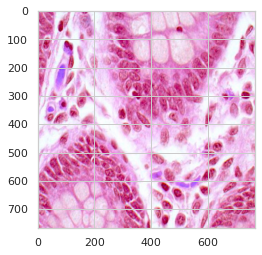

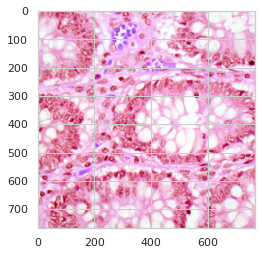

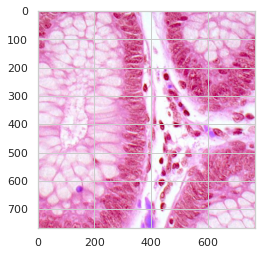

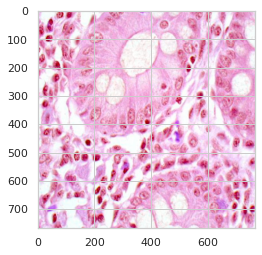

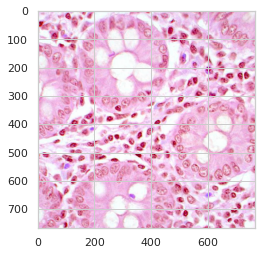

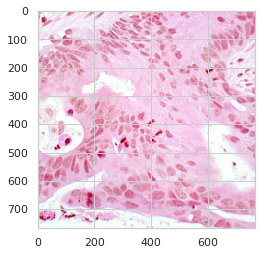

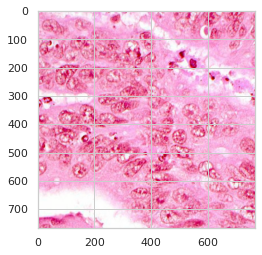

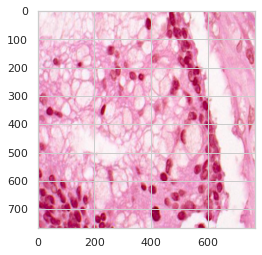

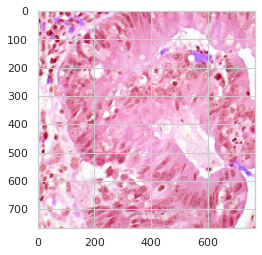

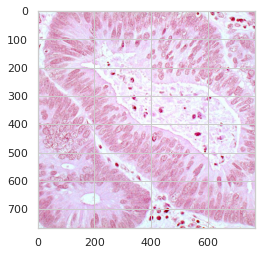

In [10]:
DATADIR = '/content/lung_colon_image_set/colon_image_sets'
CATEGORIES = ["colon_n","colon_aca"]
for category in CATEGORIES:  # do colon_aca and colon_n
    path = os.path.join(DATADIR,category)  # create path to colon_aca and colon_n
    x=0
    for img in os.listdir(path):  # iterate over each image per colon_aca and colon_n
        x+=1
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        #plt.imshow(img_array, cmap='gray')  ## graph it
        plt.imshow(img_array) 
        plt.show()  # display!
        if x==5 : 
            break    

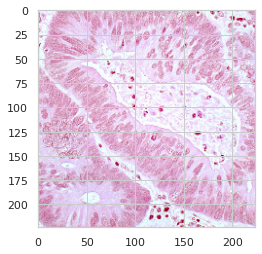

In [11]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [12]:
print(img_array)
print(img_array.shape)

[[[227 248 249]
  [226 247 248]
  [228 248 249]
  ...
  [235 178 211]
  [223 169 199]
  [218 164 194]]

 [[231 250 253]
  [229 249 250]
  [228 247 250]
  ...
  [220 178 209]
  [217 176 204]
  [220 179 207]]

 [[237 253 255]
  [234 251 254]
  [231 247 253]
  ...
  [204 187 214]
  [212 196 220]
  [223 207 231]]

 ...

 [[242 247 250]
  [242 247 250]
  [237 244 247]
  ...
  [226 218 249]
  [222 213 246]
  [218 209 242]]

 [[224 219 221]
  [233 230 232]
  [241 240 242]
  ...
  [220 227 254]
  [217 223 252]
  [215 221 250]]

 [[200 191 194]
  [220 213 216]
  [243 238 240]
  ...
  [218 231 255]
  [217 229 255]
  [216 228 255]]]
(768, 768, 3)


In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do colon_aca and colon_n

        path = os.path.join(DATADIR,category)  # create path to colon_aca and colon_n
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=colon_aca 1=colon_n

      
        for img in tqdm(os.listdir(path)):  # iterate over each image per colon_aca and colon_n
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        

create_training_data()

print(len(training_data))

100%|██████████| 5000/5000 [00:46<00:00, 108.24it/s]

10000


In [0]:
code = {'colon_n':0 ,'colon_aca':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [0]:
# anthor code for reading All Data (adenocarcinomas and benign)

data = []
#for folder in  os.listdir(trainpath +'colon_image_sets') : 
files = gb.glob(pathname= str( trainpath +'colon_image_sets//' + 'colon_n' + '/*.jpeg'))
for file in files: 
        image = cv2.imread(file)
        data.append([image,code['colon_n'] ])

In [0]:
files = gb.glob(pathname= str( trainpath +'colon_image_sets//' + 'colon_aca' + '/*.jpeg'))
for file in files: 
        image = cv2.imread(file)
        data.append([image,code['colon_aca'] ])

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()


In [0]:
#loading it
import pickle
pickle_in = open("X.pickle","rb")
training_data = pickle.load(pickle_in)
print('Done')

In [15]:
import random
random.shuffle(training_data)
for sample in training_data[:15]:
    print(sample[1])

0
0
1
0
1
1
1
0
0
1
0
1
0
1
0


In [0]:
# spliting data
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

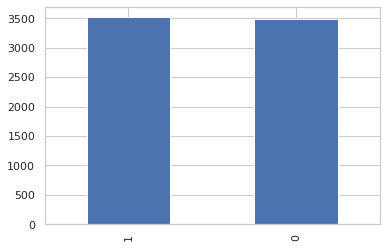

In [21]:
# traning Data
df = pd.DataFrame({
    'data': X_train,
    'category': y_train
})
df['category'].value_counts().plot.bar()

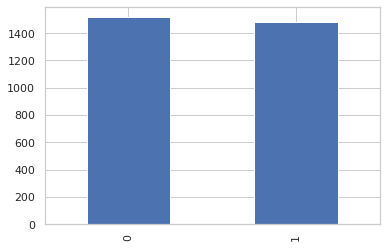

In [22]:
#Testing Data
df1 = pd.DataFrame({
    'data': X_test,
    'category': y_test
})
df1['category'].value_counts().plot.bar()

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7000, 224, 224, 3)
X_test shape  is (3000, 224, 224, 3)
y_train shape  is (7000,)
y_test shape  is (3000,)


In [0]:
#now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses
IMAGE_WIDTH = 224
IMAGE_HEIGHT=224
IMAGE_CHANNELS=3
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(124,kernel_size=(3,3),activation='relu'),      
        keras.layers.MaxPool2D(4,4),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten() ,    
        keras.layers.Dense(124,activation='relu') , 
        keras.layers.BatchNormalization(),   
        keras.layers.Dense(64,activation='relu') ,    
        keras.layers.Dense(32,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(2,activation='softmax') ,    
        ])

In [0]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 53, 53, 124)       71548     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 124)       0         
_________________________________________________________________
batch_normalization_5 (Batch (Non

In [31]:
epochs = 3
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=4)

Epoch 1/3
7000/7000 [==============================] - 1679s 240ms/step - loss: 0.4625 - accuracy: 0.7979
Epoch 2/3
7000/7000 [==============================] - 1681s 240ms/step - loss: 0.4061 - accuracy: 0.8314
Epoch 3/3
7000/7000 [==============================] - 1667s 238ms/step - loss: 0.3654 - accuracy: 0.8471


In [0]:
KerasModel.save_weights("model.h5")

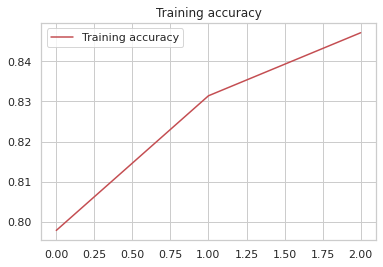

<Figure size 432x288 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = KerasModel.history.history['accuracy']
#loss = KerasModel.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', color='r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.show()

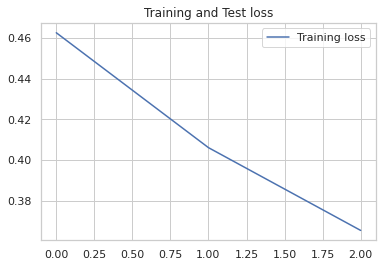

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = KerasModel.history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [34]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

3000/3000 [==============================] - 198s 66ms/step
Test Loss is 0.27465001002947487
Test Accuracy is 0.8786666393280029
